In [1]:
import math

import numpy as np
import sys
import os
import matplotlib.pyplot as plt

def get(path):
    X = []
    for data_file in os.listdir(path):
        filepath = path + data_file 
        X.append(np.loadtxt(filepath)[:,:1227])
    return np.array(X)
#path = 'log/gaussian/gamma90/'



In [48]:
Xv1 = get('./cacla/log/gaussian/32_novar_normobs_gamma90_std0.3/')
Xv2 = get('./cacla/log/gaussian/32_var_normobs_gamma90_std0.3/')



ygavg1 = np.loadtxt("./ddpg_gav/resultats/gavgaussian_95_2024-01-15_14:19:08.txt")
ygavg1 = ygavg1.mean(0)
xgav = np.arange(0,11)
xgav = 100*2**xgav
xgav = np.hstack((0,xgav))

Xv11 = get('./cacla/log/epsilon/32_novar_normobs_gamma95_std0.3/')
Xv21 = get('./cacla/log/epsilon/32_var_normobs_gamma90_std0.3/')

ygavg11 = np.loadtxt("./ddpg_gav/resultats/gavegreedy_95_2024-01-17_15:59:07.txt")
ygavg11 = ygavg11.mean(0)
xgav1 = np.arange(0,11)
xgav1 = 100*2**xgav1
xgav1 = np.hstack((0,xgav1))

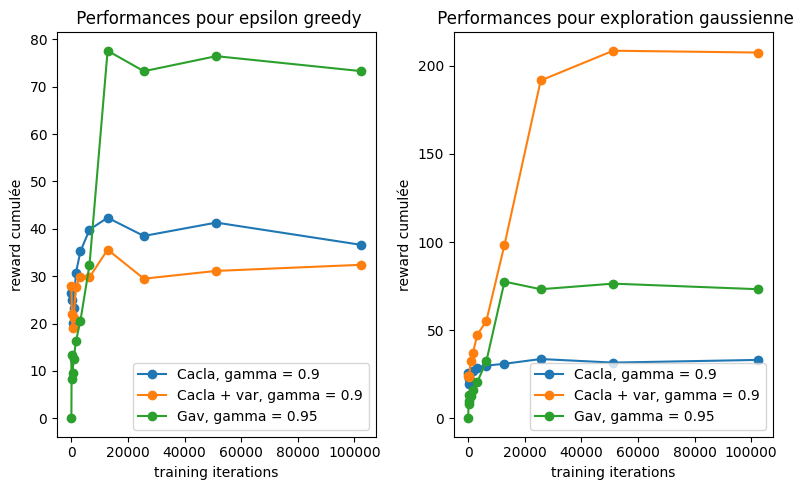

In [49]:
x = Xv1.mean(0)
x2 = Xv2.mean(0)

fig = plt.figure(figsize=(8,5))


plt.subplot(1,2,1)
x1 = Xv11.mean(0)
x21 = Xv21.mean(0)
plt.plot(x1[:,0], x1[:,1],"o-",label="Cacla, gamma = 0.9")
plt.plot(x21[:,0], x21[:,1],"o-",label="Cacla + var, gamma = 0.9")
plt.plot(xgav, ygavg1,"o-", label="Gav, gamma = 0.95")
plt.title(f' Performances pour epsilon greedy')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.legend()


plt.subplot(1,2,2)
plt.plot(x[:,0], x[:,1],"o-",label="Cacla, gamma = 0.9")
plt.plot(x2[:,0], x2[:,1],"o-",label="Cacla + var, gamma = 0.9")
plt.plot(xgav, ygavg1,"o-", label="Gav, gamma = 0.95")
plt.title(f' Performances pour exploration gaussienne')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.legend()
plt.tight_layout()